# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json
from scipy.stats import linregress
import csv
import datetime

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | carnarvon.
Processing Record 1  of Set 1 | bredasdorp.
Processing Record 2  of Set 1 | mount gambier.
Processing Record 3  of Set 1 | gat.
Processing Record 4  of Set 1 | cape town.
Processing Record 5  of Set 1 | taolanaro.
City not found...skipping taolanaro.
Processing Record 6  of Set 1 | castro.
Processing Record 7  of Set 1 | mataura.
Processing Record 8  of Set 1 | conde.
Processing Record 9  of Set 1 | mar del plata.
Processing Record 10  of Set 1 | aksu.
Processing Record 11  of Set 1 | ha giang.
Processing Record 12  of Set 1 | bluff.
Processing Record 13  of Set 1 | vypolzovo.
Processing Record 14  of Set 1 | touros.
Processing Record 15  of Set 1 | sehithwa.
Processing Record 16  of Set 1 | tasiilaq.
Processing Record 17  of Set 1 | singkang.
Processing Record 18  of Set 1 | rikitea.
Processing Record 19  of Set 1 | jamestown.
Processing Record 20  of Set 1 | mnogovershinnyy.
Processing R

Processing Record 23  of Set 4 | pevek.
Processing Record 24  of Set 4 | upernavik.
Processing Record 25  of Set 4 | chikoy.
City not found...skipping chikoy.
Processing Record 26  of Set 4 | saint george.
Processing Record 27  of Set 4 | plessisville.
Processing Record 28  of Set 4 | ubinskoye.
Processing Record 29  of Set 4 | sept-iles.
Processing Record 30  of Set 4 | esperance.
Processing Record 31  of Set 4 | glace bay.
Processing Record 32  of Set 4 | gimli.
Processing Record 33  of Set 4 | severo-kurilsk.
Processing Record 34  of Set 4 | ugoofaaru.
Processing Record 35  of Set 4 | aasiaat.
Processing Record 36  of Set 4 | castelfiorentino.
Processing Record 37  of Set 4 | nanfeng.
Processing Record 38  of Set 4 | reforma.
Processing Record 39  of Set 4 | clyde river.
Processing Record 40  of Set 4 | najran.
Processing Record 41  of Set 4 | shenjiamen.
Processing Record 42  of Set 4 | norman wells.
Processing Record 43  of Set 4 | dong hoi.
Processing Record 44  of Set 4 | cabo s

Processing Record 0  of Set 8 | korla.
Processing Record 1  of Set 8 | le pradet.
Processing Record 2  of Set 8 | quyquyho.
City not found...skipping quyquyho.
Processing Record 3  of Set 8 | sechura.
Processing Record 4  of Set 8 | ust-nera.
Processing Record 5  of Set 8 | muswellbrook.
Processing Record 6  of Set 8 | garowe.
Processing Record 7  of Set 8 | litoral del san juan.
City not found...skipping litoral del san juan.
Processing Record 8  of Set 8 | mys shmidta.
City not found...skipping mys shmidta.
Processing Record 9  of Set 8 | mango.
Processing Record 10  of Set 8 | maragogi.
Processing Record 11  of Set 8 | axim.
Processing Record 12  of Set 8 | cabedelo.
Processing Record 13  of Set 8 | dingle.
Processing Record 14  of Set 8 | balikpapan.
Processing Record 15  of Set 8 | baykit.
Processing Record 16  of Set 8 | ituni.
City not found...skipping ituni.
Processing Record 17  of Set 8 | comodoro rivadavia.
Processing Record 18  of Set 8 | gumdag.
Processing Record 19  of Se

Processing Record 30  of Set 11 | guozhen.
Processing Record 31  of Set 11 | verkhnyaya inta.
Processing Record 32  of Set 11 | oussouye.
Processing Record 33  of Set 11 | pachperwa.
Processing Record 34  of Set 11 | rimini.
Processing Record 35  of Set 11 | solsvik.
City not found...skipping solsvik.
Processing Record 36  of Set 11 | lata.
Processing Record 37  of Set 11 | tessalit.
Processing Record 38  of Set 11 | smithers.
Processing Record 39  of Set 11 | chiusi.
Processing Record 40  of Set 11 | sao geraldo do araguaia.
Processing Record 41  of Set 11 | alotau.
City not found...skipping alotau.
Processing Record 42  of Set 11 | warqla.
City not found...skipping warqla.
Processing Record 43  of Set 11 | mapiripan.
Processing Record 44  of Set 11 | lakes entrance.
Processing Record 45  of Set 11 | talaya.
Processing Record 46  of Set 11 | xinzhou.
Processing Record 47  of Set 11 | portland.
Processing Record 48  of Set 11 | walvis bay.
Processing Record 49  of Set 11 | kokkola.
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df.count()

City                630
Country             630
Date                630
Latitude            630
Longitude           630
Cloudiness (%)      630
Humidity (%)        630
Max Temp (F)        630
Wind Speed (mph)    630
dtype: int64

In [5]:
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,carnarvon,AU,2020-10-19 21:15:19,-24.87,113.63,90,73,70.07,6.7
1,bredasdorp,ZA,2020-10-19 21:15:19,-34.53,20.04,93,76,57.47,5.1
2,mount gambier,AU,2020-10-19 21:15:20,-37.83,140.77,75,54,59.27,1.5
3,gat,IL,2020-10-19 21:15:20,31.61,34.76,31,78,71.87,1
4,cape town,ZA,2020-10-19 21:13:26,-33.93,18.42,75,93,59.27,3.1


In [6]:
weather_df.to_csv('weather_df.csv',index=False, encoding='utf-8')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The plot proves that as we generally move away from the equator, temperature drops


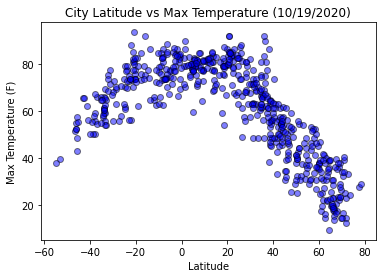

In [20]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
print("The plot proves that as we generally move away from the equator, temperature drops")
plt.savefig('City Latitude vs Max Temperature.png')

## Latitude vs. Humidity Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and humidity


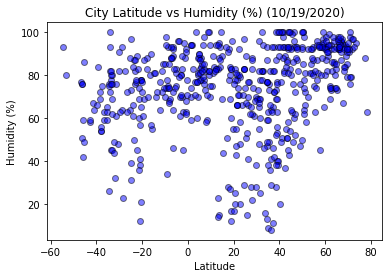

In [21]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and humidity")
plt.savefig('City Latitude vs Humidity (%).png')

## Latitude vs. Cloudiness Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness


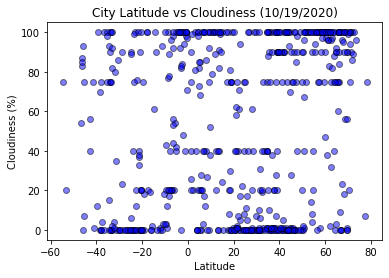

In [22]:

today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness")
plt.savefig('City Latitude vs Cloudiness.png')

## Latitude vs. Wind Speed Plot

The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed


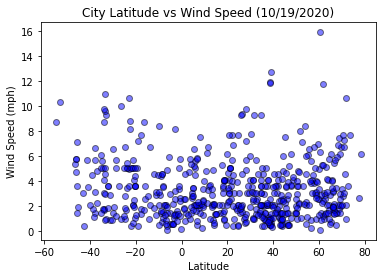

In [23]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed")
plt.savefig('City Latitude vs Wind Speend.png')

## Linear Regression

In [11]:
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.93x + 92.12
The r-squared is: -0.8876771459522776
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


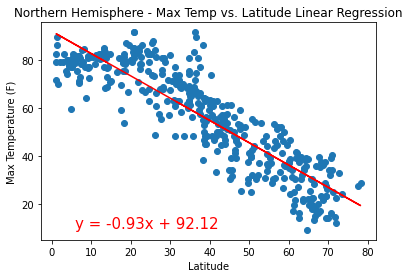

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()
plt.savefig('Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.6x + 83.0
The r-squared is: 0.740248048058677
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


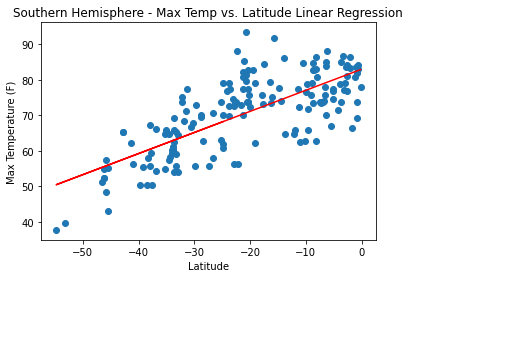

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()
plt.savefig('Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.27x + 65.45
The r-squared is: 0.25750852901512045
The regression does not display much of a correlation between the data sets.


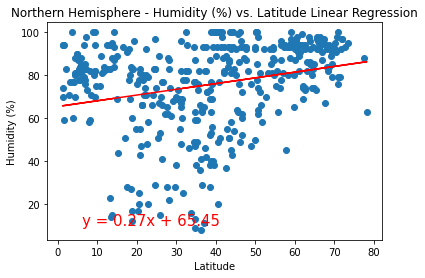

<Figure size 432x288 with 0 Axes>

In [26]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()
plt.savefig('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.3x + 77.21
The r-squared is: 0.24381353535259706
The regression does not display much of a correlation between the data sets.


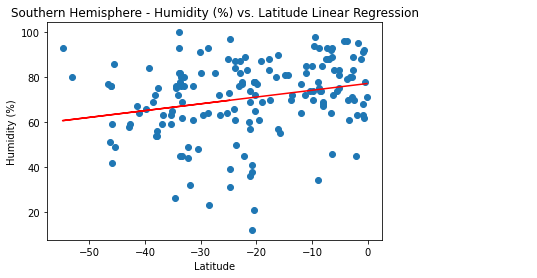

<Figure size 432x288 with 0 Axes>

In [27]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()
plt.savefig('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.49x + 33.34
The r-squared is: 0.23600377767631409
The regression does not display much of a correlation between the data sets.


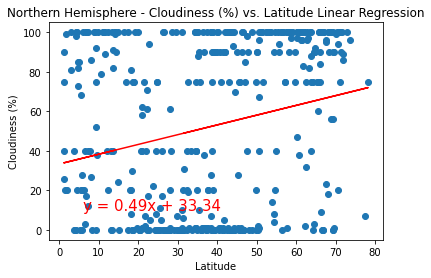

<Figure size 432x288 with 0 Axes>

In [28]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()
plt.savefig('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.5x + 57.78
The r-squared is: 0.1691697623029787
The regression does not display much of a correlation between the data sets.


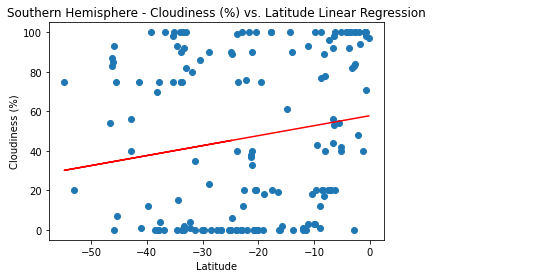

<Figure size 432x288 with 0 Axes>

In [29]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()
plt.savefig('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.01x + 2.8
The r-squared is: 0.08225045510507382
The regression does not display much of a correlation between the data sets.


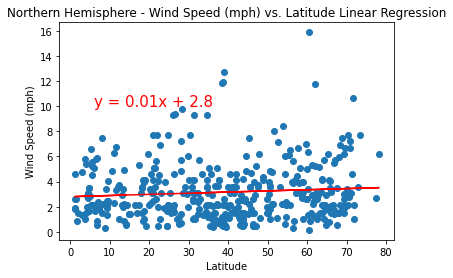

<Figure size 432x288 with 0 Axes>

In [30]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()
plt.savefig('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.06x + 2.26
The r-squared is: -0.32191433861591584
The regression does not display much of a correlation between the data sets.


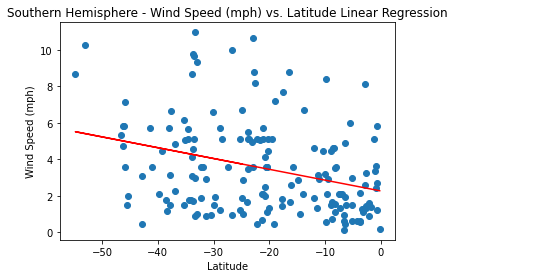

<Figure size 432x288 with 0 Axes>

In [31]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()
plt.savefig('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png')